In [66]:
import tensorflow as tf
import tensorflow_hub as hub 
import pandas as pd
import os
from IPython.display import Image
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [8]:
# Checkout the labels of our data
labels_csv = pd.read_csv("../input/classification-of-images/dataset/train.csv")
print(labels_csv.describe())
print(labels_csv.head())

                Image Class
count            5983  5983
unique           5983     4
top     image7042.jpg  Food
freq                1  2278
            Image   Class
0   image7042.jpg    Food
1   image3327.jpg    misc
2  image10335.jpg  Attire
3   image8019.jpg    Food
4   image2128.jpg  Attire


In [9]:
labels_csv.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


<AxesSubplot:>

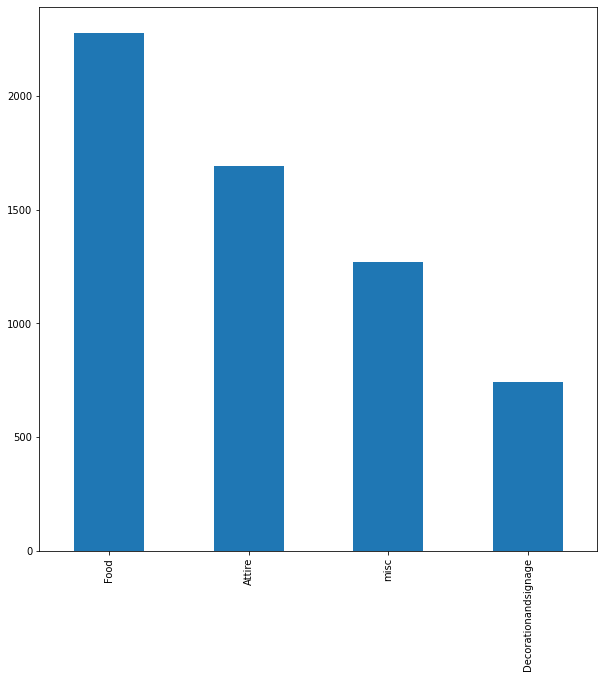

In [10]:
# How many images are there of each Class?
labels_csv["Class"].value_counts().plot.bar(figsize=(10, 10))

In [11]:
# What's the median number of images per class?
labels_csv["Class"].value_counts().median()

1481.0

In [12]:
labels_csv.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [13]:
# Create pathnames from image ID's
filenames = ["../input/classification-of-images/dataset/Train Images/" + fname + "" for fname in labels_csv["Image"]]

# Check the first 10
filenames[:10]

['../input/classification-of-images/dataset/Train Images/image7042.jpg',
 '../input/classification-of-images/dataset/Train Images/image3327.jpg',
 '../input/classification-of-images/dataset/Train Images/image10335.jpg',
 '../input/classification-of-images/dataset/Train Images/image8019.jpg',
 '../input/classification-of-images/dataset/Train Images/image2128.jpg',
 '../input/classification-of-images/dataset/Train Images/image1106.jpg',
 '../input/classification-of-images/dataset/Train Images/image6750.jpg',
 '../input/classification-of-images/dataset/Train Images/image5508.jpg',
 '../input/classification-of-images/dataset/Train Images/image9571.jpg',
 '../input/classification-of-images/dataset/Train Images/image9613.jpg']

In [14]:
labels_csv["Class"][1000]

'Attire'

In [15]:
labels = labels_csv["Class"].to_numpy() 
labels

array(['Food', 'misc', 'Attire', ..., 'Food', 'Food', 'Attire'],
      dtype=object)

In [16]:
len(labels)

5983

In [17]:
# Find the unique label values
unique_class = np.unique(labels)
len(unique_class)

4

In [18]:
unique_class

array(['Attire', 'Decorationandsignage', 'Food', 'misc'], dtype=object)

In [19]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_class

Food


array([False, False,  True, False])

In [20]:
len(labels)

5983

In [21]:
# Turn every label into a boolean array
boolean_labels = [label == unique_class for label in labels]
boolean_labels[:2]

[array([False, False,  True, False]), array([False, False, False,  True])]

In [22]:
len(boolean_labels)

5983

In [23]:
# Example: Turning boolean array into integers
print(labels[0]) 
print(np.where(unique_class == labels[0])) 
print(boolean_labels[0].argmax()) 
print(boolean_labels[0].astype(int)) 

Food
(array([2]),)
2
[0 0 1 0]


In [24]:
print(labels[2])
print(boolean_labels[2].astype(int))

Attire
[1 0 0 0]


In [25]:
boolean_labels[:2]

[array([False, False,  True, False]), array([False, False, False,  True])]

In [26]:
filenames[:10]

['../input/classification-of-images/dataset/Train Images/image7042.jpg',
 '../input/classification-of-images/dataset/Train Images/image3327.jpg',
 '../input/classification-of-images/dataset/Train Images/image10335.jpg',
 '../input/classification-of-images/dataset/Train Images/image8019.jpg',
 '../input/classification-of-images/dataset/Train Images/image2128.jpg',
 '../input/classification-of-images/dataset/Train Images/image1106.jpg',
 '../input/classification-of-images/dataset/Train Images/image6750.jpg',
 '../input/classification-of-images/dataset/Train Images/image5508.jpg',
 '../input/classification-of-images/dataset/Train Images/image9571.jpg',
 '../input/classification-of-images/dataset/Train Images/image9613.jpg']

## Creating validation set


In [27]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [28]:
len(filenames)

5983

Experimenting with 1000 images

In [29]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 

In [30]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [31]:
X_train[:5], y_train[:2]

(['../input/classification-of-images/dataset/Train Images/image8146.jpg',
  '../input/classification-of-images/dataset/Train Images/image10180.jpg',
  '../input/classification-of-images/dataset/Train Images/image999.jpg',
  '../input/classification-of-images/dataset/Train Images/image4075.jpg',
  '../input/classification-of-images/dataset/Train Images/image7069.jpg'],
 [array([False, False, False,  True]), array([ True, False, False, False])])

## Preprocessing Images

In [32]:
image = imread(filenames[42])
image.shape

(76, 80, 3)

In [33]:
image.max(), image.min()

(188, 24)

In [34]:
image[:2]

array([[[139, 139, 137],
        [140, 140, 138],
        [141, 141, 139],
        [140, 140, 138],
        [139, 139, 137],
        [139, 139, 137],
        [140, 140, 138],
        [141, 141, 139],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [150, 141, 144],
        [148, 142, 144],
        [149, 143, 145],
        [149, 143, 147],
        [150, 143, 150],
        [150, 145, 151],
        [150, 145, 151],
        [150, 145, 151],
        [149, 147, 152],
        [150, 148, 151],
        [150, 148, 149],
        [150, 150, 148],
        [151, 152, 146],
        [151, 152, 144],
        [151, 153, 142],
        [151, 153, 142],
        [144, 154, 155],
        [144, 154, 155],
        [145, 155, 156],
        [148, 156, 158],
        [150, 158, 160],
        [152, 160, 162],
        [156, 161, 164],
        [157, 163, 163],


In [67]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 80, 3), dtype=uint8, numpy=
array([[[139, 139, 137],
        [140, 140, 138],
        [141, 141, 139],
        [140, 140, 138],
        [139, 139, 137],
        [139, 139, 137],
        [140, 140, 138],
        [141, 141, 139],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [144, 144, 142],
        [150, 141, 144],
        [148, 142, 144],
        [149, 143, 145],
        [149, 143, 147],
        [150, 143, 150],
        [150, 145, 151],
        [150, 145, 151],
        [150, 145, 151],
        [149, 147, 152],
        [150, 148, 151],
        [150, 148, 149],
        [150, 150, 148],
        [151, 152, 146],
        [151, 152, 144],
        [151, 153, 142],
        [151, 153, 142],
        [144, 154, 155],
        [144, 154, 155],
        [145, 155, 156],
        [148, 156, 158],
        [150, 158, 160],
        [152, 160, 162],


In [37]:
#Function for preprocessing image
# Define image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [38]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [39]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5411765 , 0.5411765 , 0.53333336],
         [0.54131657, 0.54131657, 0.53347343],
         [0.5427171 , 0.5427171 , 0.53487396],
         ...,
         [0.4462185 , 0.4462185 , 0.4462185 ],
         [0.4434174 , 0.4434174 , 0.4434174 ],
         [0.4431373 , 0.4431373 , 0.4431373 ]],
 
        [[0.5412115 , 0.5412115 , 0.53336835],
         [0.54135156, 0.54135156, 0.5335084 ],
         [0.5427521 , 0.5427521 , 0.53490895],
         ...,
         [0.4462185 , 0.4462185 , 0.4462185 ],
         [0.4434174 , 0.4434174 , 0.4434174 ],
         [0.4431373 , 0.4431373 , 0.4431373 ]],
 
        [[0.54254204, 0.54254204, 0.5346989 ],
         [0.5426821 , 0.5426821 , 0.534839  ],
         [0.54408264, 0.54408264, 0.5362395 ],
         ...,
         [0.4462185 , 0.4462185 , 0.4462185 ],
         [0.4434174 , 0.4434174 , 0.4434174 ],
         [0.4431373 , 0.4431373 , 0.4431373 ]],
 
        ...,
 
        [[0.4784314 , 0.4784314 

In [40]:
BATCH_SIZE = 32

# function that turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # Creating labels For test dataset
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [41]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [42]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [43]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [44]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.bool)>

## Building a model

In [45]:
IMG_SIZE

224

In [47]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_class)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [48]:
INPUT_SHAPE

[None, 224, 224, 3]

In [49]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [52]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 4)                 4008      
Total params: 5,436,721
Trainable params: 4,008
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating Tensorboard Callback

In [55]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [57]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join(".//logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Creating Early Stopping Callback

In [74]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=10)

## Training a model (on subset of data)

In [75]:
NUM_EPOCHS = 100

In [77]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [78]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


2022-10-12 10:34:53.961671: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-12 10:34:53.961714: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-12 10:34:54.095158: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-12 10:34:54.095334: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/100
 2/25 [=>............................] - ETA: 10s - loss: 1.7083 - accuracy: 0.4219 

2022-10-12 10:34:57.541906: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-12 10:34:57.541958: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-12 10:34:58.005516: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-10-12 10:34:58.006617: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-10-12 10:34:58.143896: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 285 callback api events and 282 activity events. 
2022-10-12 10:34:58.155847: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-12 10:34:58.169549: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: .//logs/20221012-103453/train/plugins/profile/2022_10_12_10_34_58

2022-10-12 10:34:58.180142: I tensorflow/core/profiler/rpc/client/save_profile.cc:142

 7/25 [=======>......................] - ETA: 3s - loss: 1.4432 - accuracy: 0.4286

2022-10-12 10:34:58.212778: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: .//logs/20221012-103453/train/plugins/profile/2022_10_12_10_34_58

2022-10-12 10:34:58.220891: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to .//logs/20221012-103453/train/plugins/profile/2022_10_12_10_34_58/7adfdbb9f9ff.memory_profile.json.gz
2022-10-12 10:34:58.222055: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: .//logs/20221012-103453/train/plugins/profile/2022_10_12_10_34_58
Dumped tool data for xplane.pb to .//logs/20221012-103453/train/plugins/profile/2022_10_12_10_34_58/7adfdbb9f9ff.xplane.pb
Dumped tool data for overview_page.pb to .//logs/20221012-103453/train/plugins/profile/2022_10_12_10_34_58/7adfdbb9f9ff.overview_page.pb
Dumped tool data for input_pipeline.pb to .//logs/20221012-103453/train/plugins/profile/2022_10_12_10_34_58/7adfdbb9f9ff.input_pipeline.pb
Dumped 

25/25 [==============================] - 6s 105ms/step - loss: 1.1775 - accuracy: 0.5575 - val_loss: 0.9613 - val_accuracy: 0.6600
Epoch 2/100
25/25 [==============================] - 1s 44ms/step - loss: 0.7150 - accuracy: 0.7350 - val_loss: 0.8517 - val_accuracy: 0.7100
Epoch 3/100
25/25 [==============================] - 1s 47ms/step - loss: 0.5575 - accuracy: 0.8000 - val_loss: 0.8149 - val_accuracy: 0.7050
Epoch 4/100
25/25 [==============================] - 1s 41ms/step - loss: 0.4584 - accuracy: 0.8350 - val_loss: 0.7800 - val_accuracy: 0.7100
Epoch 5/100
25/25 [==============================] - 1s 41ms/step - loss: 0.3888 - accuracy: 0.8725 - val_loss: 0.7891 - val_accuracy: 0.7000
Epoch 6/100
25/25 [==============================] - 1s 44ms/step - loss: 0.3398 - accuracy: 0.8813 - val_loss: 0.7777 - val_accuracy: 0.6900
Epoch 7/100
25/25 [==============================] - 1s 44ms/step - loss: 0.3032 - accuracy: 0.8988 - val_loss: 0.7701 - val_accuracy: 0.6900
Epoch 8/100
25/25

## Making and evaluating predictions using a trained model 

In [83]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.bool)>

In [84]:
# Make predictions on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 36s 25ms/step


array([[6.63300836e-03, 2.92831210e-05, 9.91835892e-01, 1.50182797e-03],
       [3.12021111e-05, 9.99926567e-01, 2.03372133e-06, 4.01409852e-05],
       [9.69686568e-01, 3.00906226e-03, 2.53982339e-02, 1.90617284e-03],
       [9.40543413e-01, 7.18192459e-05, 5.92185743e-02, 1.66101832e-04],
       [4.86539043e-02, 7.01415818e-03, 1.25566311e-03, 9.43076313e-01],
       [9.93839085e-01, 5.55055775e-03, 1.33670226e-04, 4.76674322e-04],
       [5.72958343e-05, 9.90695477e-01, 2.59168533e-04, 8.98807589e-03],
       [2.27340236e-01, 2.97290844e-05, 4.50755090e-01, 3.21874887e-01],
       [2.31782556e-01, 3.95955198e-04, 7.61106670e-01, 6.71483716e-03],
       [7.59002209e-01, 8.43455177e-03, 7.62152448e-02, 1.56348005e-01],
       [9.65103567e-01, 1.72966946e-04, 3.23944278e-02, 2.32907361e-03],
       [2.43772957e-02, 1.20761142e-04, 8.39951038e-01, 1.35550886e-01],
       [2.78990919e-04, 1.00215322e-04, 3.08367470e-03, 9.96537089e-01],
       [1.01032003e-03, 9.85742092e-01, 3.33986385e

In [85]:
predictions[0]

array([6.6330084e-03, 2.9283121e-05, 9.9183589e-01, 1.5018280e-03],
      dtype=float32)

In [87]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_class[np.argmax(predictions[index])]}")

[0.00112654 0.93457794 0.01335485 0.0509406 ]
Max value (probability of prediction): 0.9345779418945312
Sum: 0.9999998807907104
Max index: 1
Predicted label: Decorationandsignage


In [89]:
unique_class[1]

'Decorationandsignage'

In [92]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_class[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[1])
pred_label

'Decorationandsignage'

In [93]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.bool)>

In [95]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_class[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.18431373, 0.18431373, 0.1764706 ],
         [0.1834734 , 0.1834734 , 0.17563026],
         [0.17507003, 0.17507003, 0.1672269 ],
         ...,
         [0.2932773 , 0.31288514, 0.3285714 ],
         [0.2904762 , 0.31008404, 0.32577032],
         [0.2901961 , 0.30980393, 0.3254902 ]],
 
        [[0.18571429, 0.18571429, 0.17787115],
         [0.18482395, 0.18482395, 0.1769808 ],
         [0.17592037, 0.17592037, 0.16807723],
         ...,
         [0.28987592, 0.30948377, 0.32517004],
         [0.28507403, 0.30468187, 0.32036814],
         [0.28459385, 0.3042017 , 0.31988797]],
 
        [[0.1879552 , 0.1879552 , 0.18011205],
         [0.1869848 , 0.1869848 , 0.17914166],
         [0.17728092, 0.17728092, 0.16943778],
         ...,
         [0.2844337 , 0.30404153, 0.3197278 ],
         [0.27643055, 0.2960384 , 0.31172466],
         [0.27563027, 0.2952381 , 0.31092438]],
 
        ...,
 
        [[0.21764722, 0.2215688 , 0.19019625],
         [0.2185676 , 0.22248916, 0.19111

In [96]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

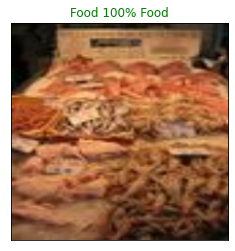

In [97]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [100]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_class[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

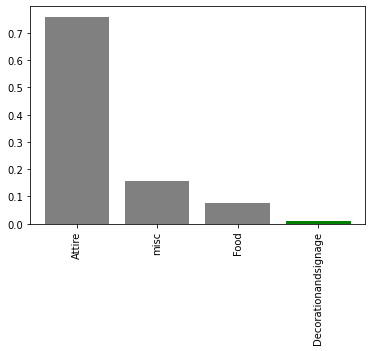

In [101]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

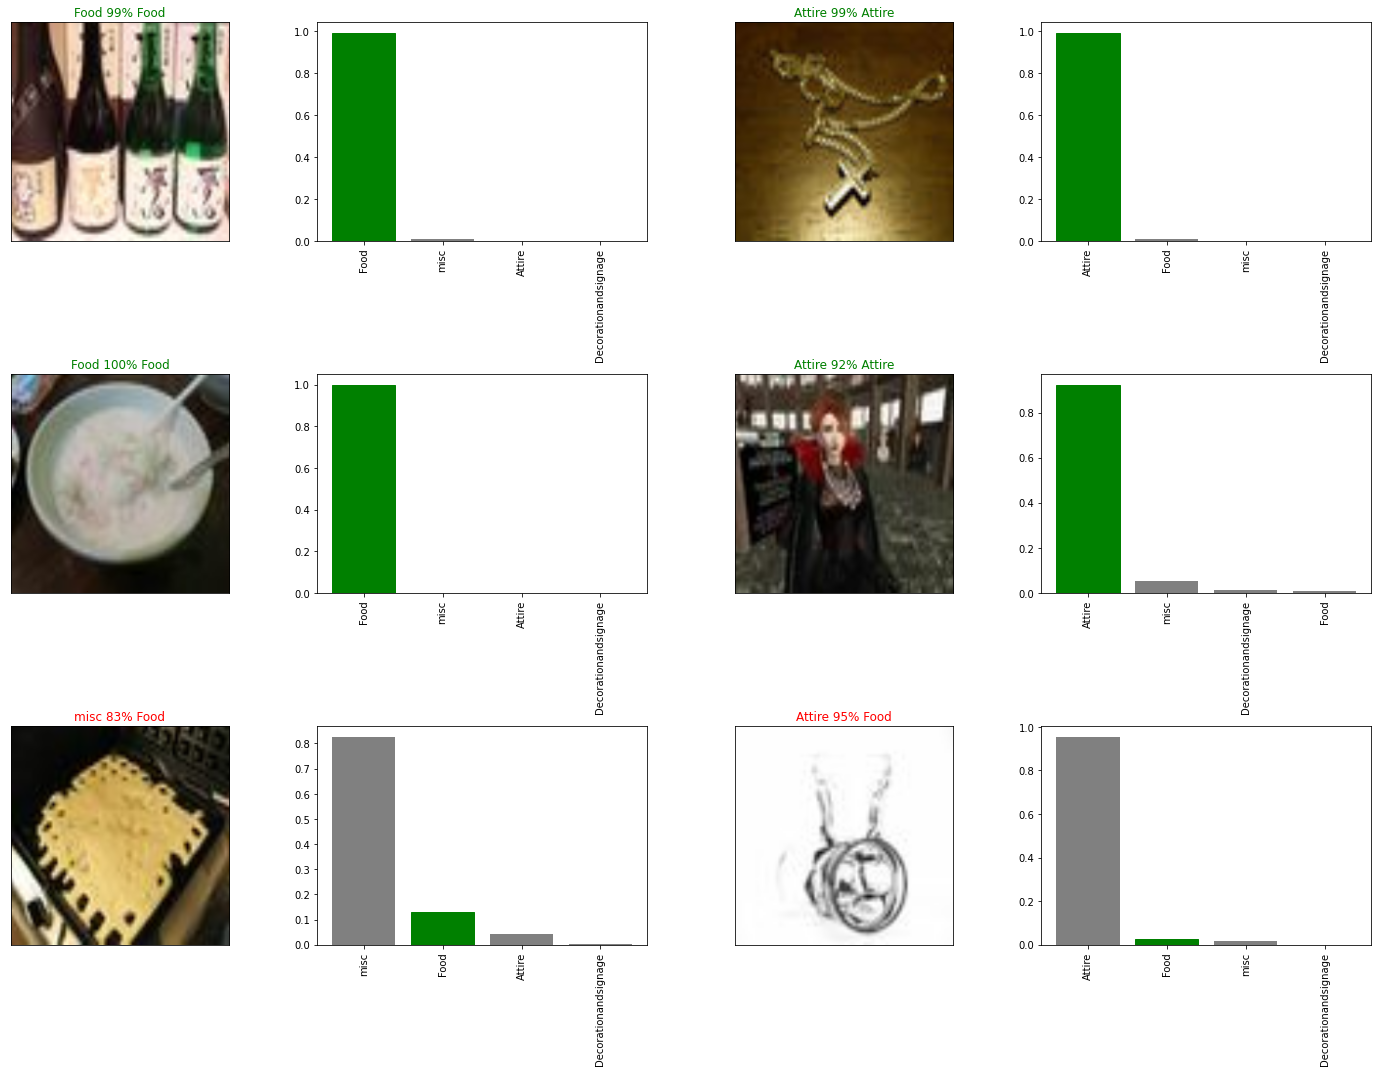

In [102]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [103]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join(".//models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [104]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [106]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-classification")

Saving model to: .//models/20221012-11021665572542-1000-images-classification.h5...


'.//models/20221012-11021665572542-1000-images-classification.h5'

In [107]:
# Load a trained model
loaded_1000_image_model = load_model('./models/20221012-11021665572542-1000-images-classification.h5')

Loading saved model from: ./models/20221012-11021665572542-1000-images-classification.h5


In [108]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 0s 30ms/step - loss: 0.8772 - accuracy: 0.7150


[0.8771787881851196, 0.7149999737739563]

In [109]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 32ms/step - loss: 0.8772 - accuracy: 0.7150


[0.8771787881851196, 0.7149999737739563]

## Training the full data

In [110]:
len(X), len(y)

(5983, 5983)

In [111]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [112]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.bool)>

In [113]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [114]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=10)

2022-10-12 11:08:55.575067: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-12 11:08:55.575124: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-12 11:08:55.813169: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-12 11:08:55.813319: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [115]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
  1/187 [..............................] - ETA: 10:27 - loss: 1.6909 - accuracy: 0.3438

2022-10-12 11:09:51.863924: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-12 11:09:51.863980: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/187 [..............................] - ETA: 1:43 - loss: 1.9703 - accuracy: 0.2969 

2022-10-12 11:09:53.052291: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-10-12 11:09:53.054132: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-10-12 11:09:53.199064: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 285 callback api events and 282 activity events. 
2022-10-12 11:09:53.213036: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-12 11:09:53.245716: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: .//logs/20221012-110855/train/plugins/profile/2022_10_12_11_09_53



  3/187 [..............................] - ETA: 2:51 - loss: 1.8987 - accuracy: 0.3125

2022-10-12 11:09:53.262063: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to .//logs/20221012-110855/train/plugins/profile/2022_10_12_11_09_53/7adfdbb9f9ff.trace.json.gz
2022-10-12 11:09:53.350572: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: .//logs/20221012-110855/train/plugins/profile/2022_10_12_11_09_53

2022-10-12 11:09:53.361269: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to .//logs/20221012-110855/train/plugins/profile/2022_10_12_11_09_53/7adfdbb9f9ff.memory_profile.json.gz
2022-10-12 11:09:53.363463: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: .//logs/20221012-110855/train/plugins/profile/2022_10_12_11_09_53
Dumped tool data for xplane.pb to .//logs/20221012-110855/train/plugins/profile/2022_10_12_11_09_53/7adfdbb9f9ff.xplane.pb
Dumped tool data for overview_page.pb to .//logs/20221012

187/187 [==============================] - 21s 95ms/step - loss: 0.7642 - accuracy: 0.7237
Epoch 2/100
187/187 [==============================] - 6s 31ms/step - loss: 0.5321 - accuracy: 0.8071
Epoch 3/100
187/187 [==============================] - 6s 33ms/step - loss: 0.4798 - accuracy: 0.8282
Epoch 4/100
187/187 [==============================] - 6s 32ms/step - loss: 0.4564 - accuracy: 0.8325
Epoch 5/100
187/187 [==============================] - 6s 32ms/step - loss: 0.4337 - accuracy: 0.8417
Epoch 6/100
187/187 [==============================] - 6s 31ms/step - loss: 0.4238 - accuracy: 0.8466
Epoch 7/100
187/187 [==============================] - 6s 32ms/step - loss: 0.4153 - accuracy: 0.8482
Epoch 8/100
187/187 [==============================] - 6s 34ms/step - loss: 0.4022 - accuracy: 0.8533
Epoch 9/100
187/187 [==============================] - 6s 31ms/step - loss: 0.4008 - accuracy: 0.8507
Epoch 10/100
187/187 [==============================] - 6s 31ms/step - loss: 0.3979 - accurac

In [116]:
save_model(full_model, suffix="full-image-classification")

Saving model to: .//models/20221012-11281665574118-full-image-classification.h5...


'.//models/20221012-11281665574118-full-image-classification.h5'

In [117]:
# Load in the full model
loaded_full_model = load_model('./models/20221012-11281665574118-full-image-classification.h5')

Loading saved model from: ./models/20221012-11281665574118-full-image-classification.h5


## Making predictions on the test dataset

In [124]:
# Load test image filenames
test_path = "../input/classification-of-images/dataset/Test Images/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['../input/classification-of-images/dataset/Test Images/image4781.jpg',
 '../input/classification-of-images/dataset/Test Images/image5500.jpg',
 '../input/classification-of-images/dataset/Test Images/image7761.jpg',
 '../input/classification-of-images/dataset/Test Images/image10876.jpg',
 '../input/classification-of-images/dataset/Test Images/image7545.jpg',
 '../input/classification-of-images/dataset/Test Images/image1465.jpg',
 '../input/classification-of-images/dataset/Test Images/image4332.jpg',
 '../input/classification-of-images/dataset/Test Images/image3561.jpg',
 '../input/classification-of-images/dataset/Test Images/image1263.jpg',
 '../input/classification-of-images/dataset/Test Images/image5906.jpg']

In [125]:
len(test_filenames)

3219

In [128]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [129]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [130]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

101/101 [==============================] - 9s 89ms/step


In [132]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt(".//preds_array.csv", test_predictions, delimiter=",")

In [133]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt(".//preds_array.csv", delimiter=",")

In [134]:
test_predictions[:10]

array([[3.89476249e-04, 8.66204381e-01, 2.61661746e-02, 1.07239954e-01],
       [3.81653607e-01, 3.34550123e-07, 6.17558300e-01, 7.87694647e-04],
       [1.80571352e-03, 5.66612362e-05, 9.97690201e-01, 4.47440805e-04],
       [2.45180994e-01, 3.25356203e-04, 3.02175861e-02, 7.24276066e-01],
       [8.24084044e-01, 1.44222913e-05, 1.75899759e-01, 1.75135517e-06],
       [7.99973588e-03, 7.21230055e-04, 2.00355053e-01, 7.90924013e-01],
       [2.82122996e-02, 3.22819687e-03, 9.68077779e-01, 4.81649913e-04],
       [2.23990683e-12, 1.00000000e+00, 6.01620186e-12, 1.66440515e-08],
       [1.78126775e-05, 9.99476731e-01, 3.09441248e-07, 5.05163916e-04],
       [8.31177890e-01, 7.19744014e-04, 7.07032457e-02, 9.73991305e-02]])

In [135]:
test_predictions.shape

(3219, 4)